## Databehandling af rå McStas-data for phononmode 0

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats, signal
from sympy.abc import x

In [8]:
phononmodes = 4
data = [[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]],
[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]],
[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]],
[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]],
[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]],
[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]]

slice = [[[4.5,6.5],[4.5,6.5],[5.4,6.5],[2.5,4.5],[1,3.5],[0,2],[0,4],[2,6.5],[4,6],[4,8],[4,8]], #mode 0
         [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]], #mode 1
         [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]], #mode 2
         [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]], #mode 3
         [[10,12.2],[10,13],[7,9.5],[7,9.8],[7,9.8],[7,9.8],[7,9.8],[7,9.8],[7,9.8],[9,15],[10,12.2]], #mode 4
         [[10,13],[12.5,13.8],[12,16],[13.9,16.3],[14.5,17.3],[14,18],[14,18],[13.5,17.5],[13,16.2],[13,15],[10,13.5]]] #mode 5

forsjovdata = np.genfromtxt('/Applications/McStas/tester_Eigen/Eigen_Phononkomponent/PH{}_h0_l{}/mccode.dat'.format(2,3.6), delimiter = '', skip_header = 1, usecols = (0,-2,-1))
plt.plot(forsjovdata[:,0],forsjovdata[:,1],'.')

OSError: /Applications/McStas/tester_Eigen/Eigen_Phononkomponent/PH2_h0_l3.6/mccode.dat not found.

In [ ]:
def normplot(x,mu1,std1,k1,mu2,std2,k2,mu3,std3,k3):
    return  k1*(np.exp(-(x-mu1)**2/std1**2)) + k2*(np.exp(-(x-mu2)**2/std2**2))+k3*(np.exp(-(x-mu3)**2/std3**2)) 
 
def get_data(i,j):
    l=round(1.5+0.1*j,ndigits=1)
    gendata = np.genfromtxt('/Applications/McStas/tester_Eigen/Eigen_Phononkomponent/PH{}_h0_l{}/mccode.dat'.format(i,l), delimiter = '', skip_header = 1, skip_footer = 0)
    if i==5:
        print(k)
    x_data=gendata[:,0] 
    y_data=gendata[:,-2]
    err_data=gendata[:,-1]
    return x_data, y_data, err_data


def kør(data):
    for i in range(phononmodes):
        if i == 1 or i == 2 or i == 3:
            continue
        for j in range(11):
            x_data, y_data, err_data= get_data(i,j)
            data[i][j][0] = x_data
            data[i][j][1] = y_data
            data[i][j][2] = err_data
            mean,sigma = means(x_data, y_data, err_data,i,j)
            data[i][j][3] = mean
            data[i][j][4] = sigma
        print('Phononmode {} er færdig'.format(i))
    return   data
 


def means(x_data, y_data, err_data,i,j):  
    slice_x_data = np.array([])
    slice_y_data = np.array([])
    slice_err_data = np.array([])
    for k in range(len(x_data)):
        if slice[i][j][0]<x_data[k]<slice[i][j][1]:
             slice_x_data = np.append(slice_x_data, x_data[k])
             slice_y_data = np.append(slice_y_data, y_data[k])
             slice_err_data = np.append(slice_err_data, err_data[k])
    peaks = signal.find_peaks(slice_y_data, height = 0, distance = 50)
    if i== 5 and j==1:
        print(peaks)
        plt.plot(slice_x_data, slice_y_data, '.', label = 'data {}'.format(j))
        plt.legend()

    if len(peaks[0]) == 1:
        par, cov = curve_fit(normplot, slice_x_data, slice_y_data, p0 = [slice_x_data[peaks[0][0]], 0.5, slice_y_data[peaks[0][0]],0.1,0.1,0.1,0.1,0.1,0.1], sigma = slice_err_data, maxfev = 1000)
        if i== 5 and j==1:
            plt.plot(slice_x_data, normplot(slice_x_data,*par))

    if len(peaks[0]) == 2:
        par, cov = curve_fit(normplot, slice_x_data, slice_y_data, p0 = [slice_x_data[peaks[0]], 0.5, slice_y_data[peaks[0]],0.1,0.1,0,0.1,0.1,0], sigma = slice_err_data, maxfev = 1000)
        par, cov = np.append(par, cov, curve_fit(normplot, slice_x_data, slice_y_data, p0 = [slice_x_data[peaks[1]], 0.5, slice_y_data[peaks[1]],0.1,0.1,0,0.1,0.1,0], sigma = slice_err_data, maxfev = 1000))
        #plt.plot(slice_x_data, normplot(slice_x_data, *par,0.1,0.1,0))

    if len(peaks[0]) >= 3:
        par, cov = curve_fit(normplot, slice_x_data, slice_y_data, p0 = [slice_x_data[peaks[0]], 0.5, slice_y_data[peaks[0]],0.1,0.1,0,0.1,0.1,0], sigma = slice_err_data, maxfev = 1000)
        par, cov = np.append(par, curve_fit(normplot, slice_x_data, slice_y_data, p0 = [slice_x_data[peaks[1]], 0.5, slice_y_data[peaks[1]],0.1,0.1,0,0.1,0.1,0], sigma = slice_err_data, maxfev = 1000))
        par, cov = np.append(par, cov, curve_fit(normplot, slice_x_data, slice_y_data, p0 = [slice_x_data[peaks[2]], 0.5, slice_y_data[peaks[2]],0.1,0.1,0,0.1,0.1,0], sigma = slice_err_data, maxfev = 1000))
        #plt.plot(slice_x_data, normplot(slice_x_data, *par))
    
    mean = par[np.argmax(par[::3])]
    sigma = par[np.argmax(par[::3])+1]
    #plt.plot(x_data, y_data,'.')
    #plt.errorbar(x_data, y_data, yerr = err_data, fmt = '.')
    return mean, sigma


In [ ]:
kør(data)

NameError: name 'data' is not defined

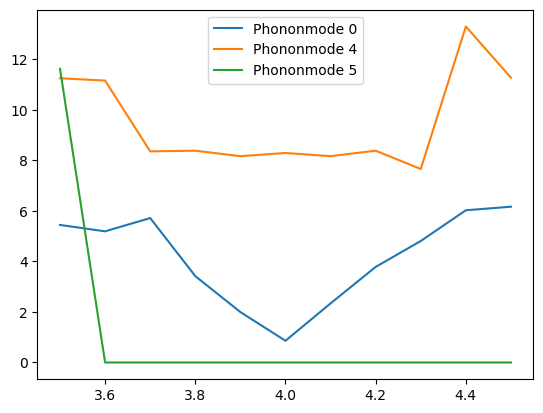

In [ ]:
def phonon_plot(data):
    for i in range(phononmodes):
        if i == 1 or i == 2 or i == 3:
            continue
        y_phonon = np.array([])
        for j in range(11):
            y_phonon = np.append(y_phonon, data[i][j][3])
        plt.plot(np.linspace(3.5,4.5,11), y_phonon, label = 'Phononmode {}'.format(i))
    plt.legend()
phonon_plot(data)